In [7]:
import dlib, cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects

detector = dlib.get_frontal_face_detector()
#얼굴 랜드마크 탐지 모델
sp = dlib.shape_predictor('models/shape_predictor_68_face_landmarks.dat')
#얼굴 인식 모델
facerec = dlib.face_recognition_model_v1('models/dlib_face_recognition_resnet_model_v1.dat')

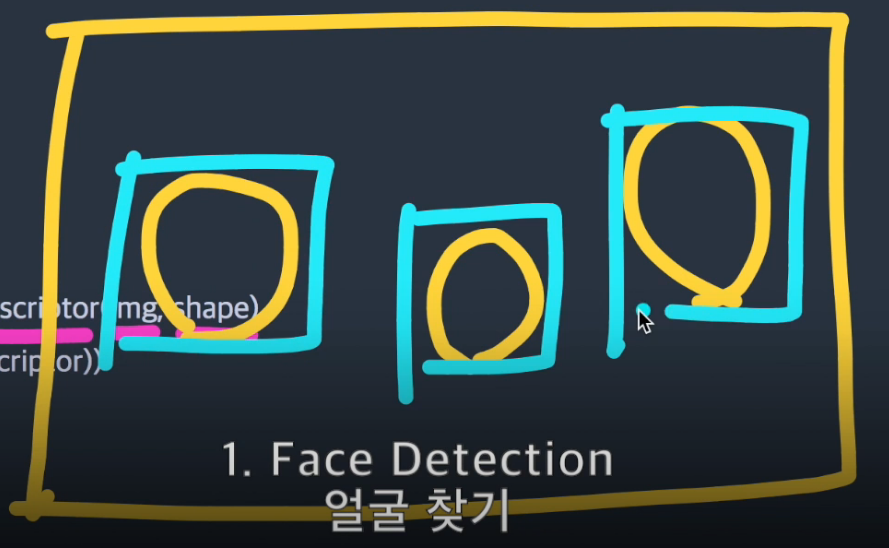
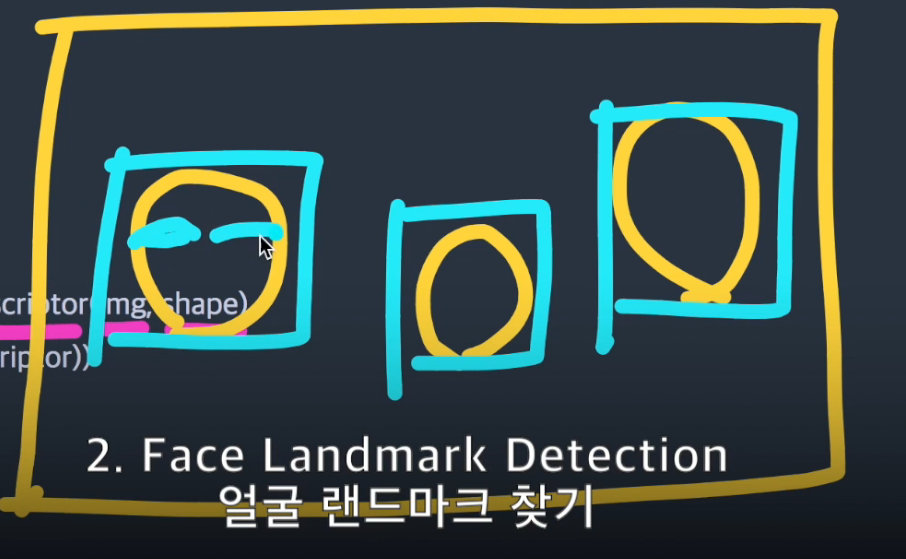
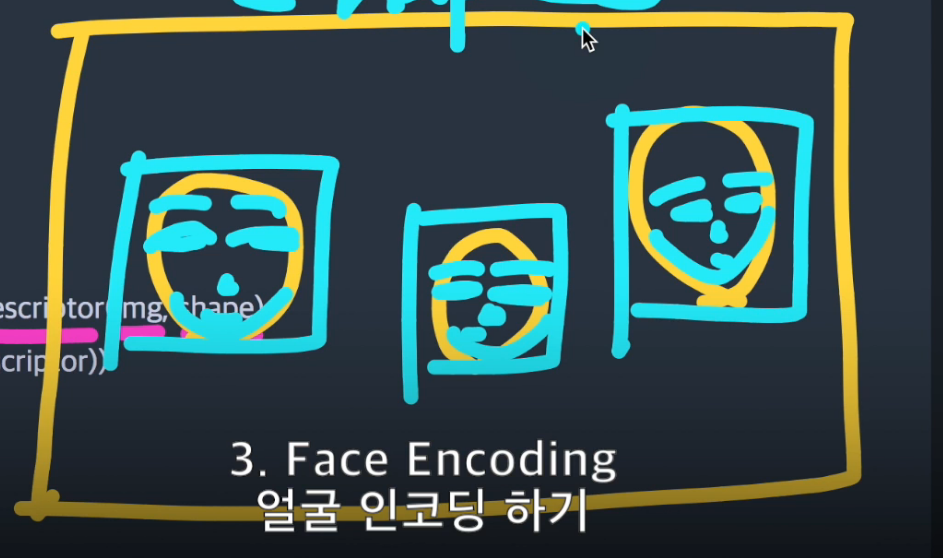
인코딩
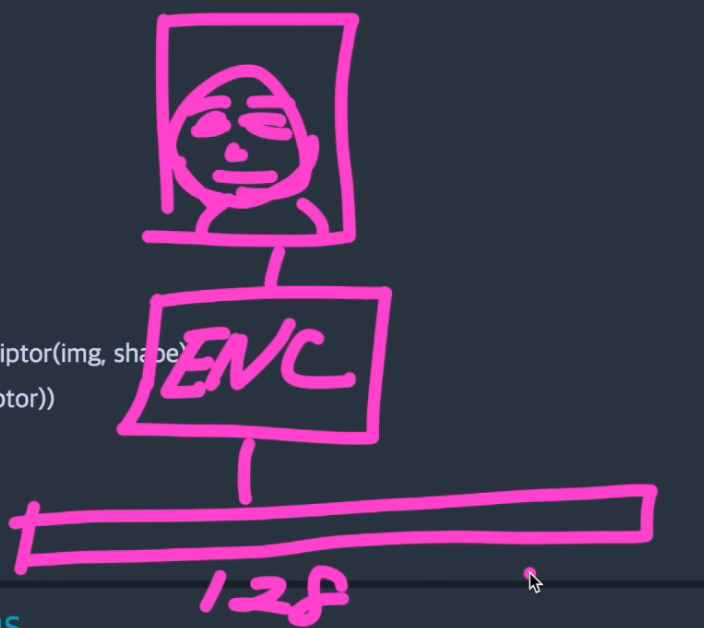

In [10]:
#얼굴 찾기와 얼굴 랜드마크 찾기 
def find_faces(img):
    dets = detector(img, 1)
    
    #얼굴을 못찾을 경우 
    if len(dets) == 0 :
        return np.empty(0), np.empty(0), np.empty(0)
    rects, shapes = [], []
    # 68개의 점을 찍어준다 
    shapes_np = np.zeros((len(dets), 68, 2), dtype = np.int)
     #얼굴 갯수 만큼 loop를 돈다 
    for k, d in enumerate(dets):
        rect = ((d.left(), d.top()), (d.right(),d.bottom()))
        #얼굴의 사각형을 넣어준다 
        rects.append(rect)
        
        #얼굴의 랜드마크를 넣어준다
        shape = sp(img, d)
        
        #convert dlib shape to numpy array
        for i in range(0, 68):
            shapes_np[k][i] = (shape.part(i).x, shape.part(i).y)
            
        shapes.append(shape)
    return rects, shapes, shapes_np

# 얼굴을 인코드 하는 함수 
def encode_faces(img, shapes):
    face_descriptors = []
    for shape in shapes:
        #얼굴을 인코딩 한다 (전체 이미지와 랜드마크 값이 들어간다 )
        face_descriptor = facerec.compute_face_descriptor(img, shape)
        face_descriptors.append(np.array(face_descriptor))
        
    return np.array(face_descriptors)

In [11]:
#사용자 이미지 저장
img_paths = {
    'neo' : './img/neo.jpg',
    'trinity':'./img/trinity.jpg',
    'morpheus':'./img/morpheus.jpg',
    'smith':'./img/smith.jpg'
}

# 계산한 결과를 저장할 공간
descs = {
    'neo' : None,
    'trinity': None,
    'morpheus': None,
    'smith':None
}

for name, img_path in img_paths.items():
    img_bgr = cv2.imread(img_path)
    #BGR -> RGB로 변환
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    #랜드 마크를 받아 온다 (img_shapes)
    _, img_shapes, _ = find_faces(img_rgb)
    #이미지와 shape을 저장
    descs[name] = encode_faces(img_rgb, img_shapes)[0]
    
np.save('img/descs.npy', descs)
print(descs)
    


<ipython-input-10-c596c9eb6956>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  shapes_np = np.zeros((len(dets), 68, 2), dtype = np.int)


{'neo': array([-0.10253663,  0.1210689 ,  0.11573793,  0.00205042, -0.07788962,
        0.0455309 , -0.05843274, -0.0519091 ,  0.21658492,  0.01360174,
        0.22794811, -0.06277425, -0.24470335, -0.07928558,  0.06872851,
        0.08918308, -0.18241556, -0.12478449,  0.02782023, -0.0830949 ,
        0.07161663,  0.05966347,  0.00160632,  0.06678436, -0.21823257,
       -0.36267716, -0.06694743, -0.14702256,  0.04950852, -0.1844839 ,
       -0.0644467 ,  0.00363292, -0.21857822, -0.11856331,  0.02003656,
        0.11713767, -0.07477781, -0.09792066,  0.14710173, -0.01258704,
       -0.13804421,  0.02091832,  0.04052263,  0.22699335,  0.20785414,
        0.07426941, -0.01183021, -0.0786138 ,  0.14942402, -0.25231487,
        0.09901293,  0.22049414,  0.09498686,  0.09029035,  0.09735814,
       -0.15367737, -0.0305498 ,  0.14856222, -0.26968357,  0.10302345,
        0.08786085,  0.01532106,  0.04833578, -0.0422222 ,  0.13174652,
        0.09351434, -0.08683694, -0.11075915,  0.0428902

## Compute Input

In [20]:
img_bgr = cv2.imread('img/matrix3.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

rects, shapes, _ = find_faces(img_rgb)
descriptors = encode_faces(img_rgb, shapes)

<ipython-input-10-c596c9eb6956>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  shapes_np = np.zeros((len(dets), 68, 2), dtype = np.int)


## Visualize Output
- 유클리드 거리로 사람 얼굴을 판별 ( p <0.6)
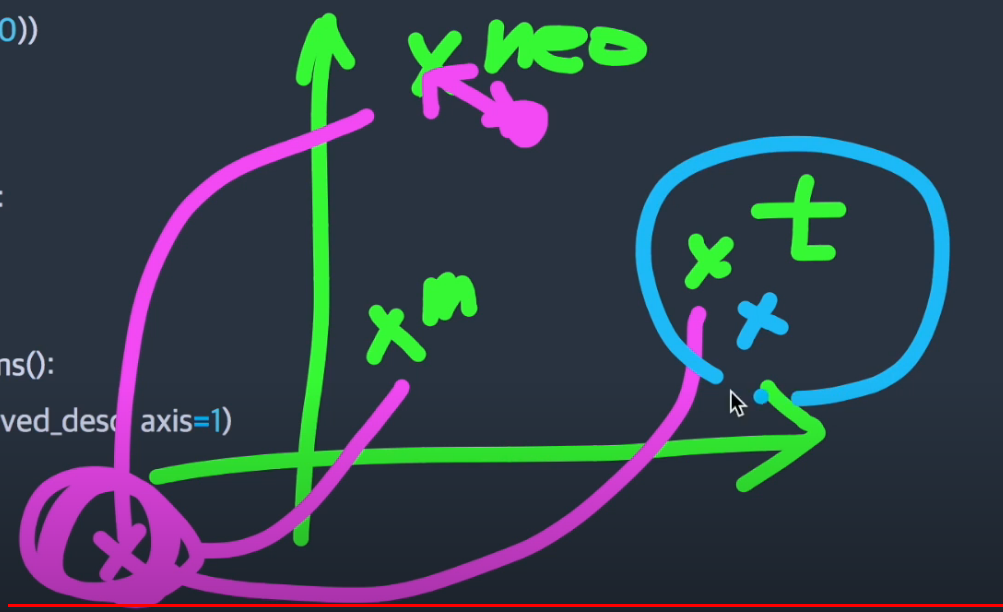

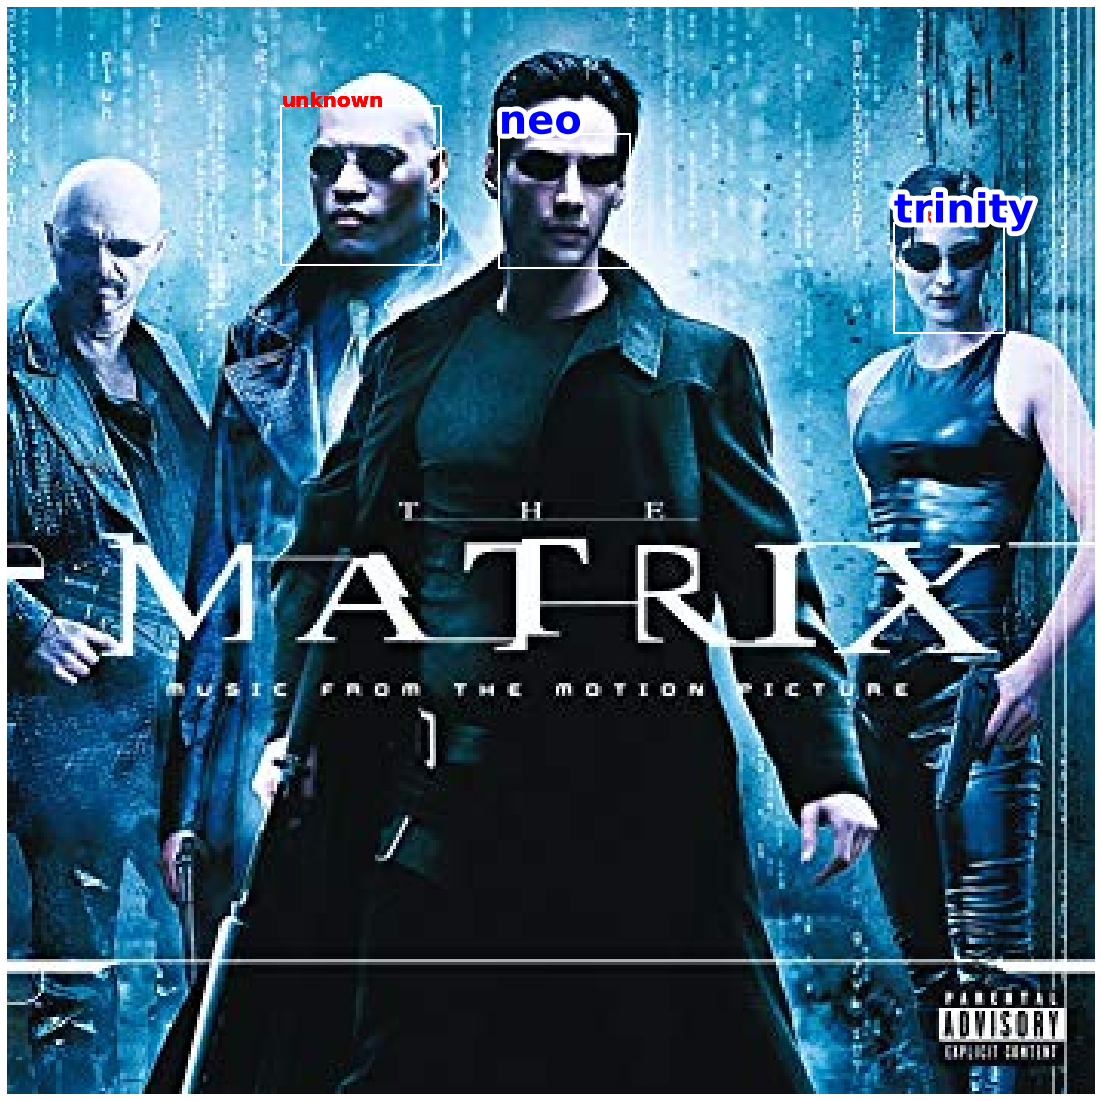

In [21]:
fig, ax = plt.subplots(1, figsize = (20,20))
ax.imshow(img_rgb)

#얼굴을 찾은 갯수 만큼 판별 해준다 
for i, desc in enumerate(descriptors):
    found = False
    #저장된 얼굴만큼 루프문을 돈다 
    for name, saved_desc in descs.items():
        # a,b 벡터 사이의 유클리드 거리를 구한다 
        dist = np.linalg.norm([desc] - saved_desc, axis = 1)
        if dist <0.6: #0.6일때 성능이 좋더라 ~
            found = True
            text = ax.text(rects[i][0][0], rects[i][0][1], name, color = 'b', fontsize = 40, fontweight = 'bold')
            text.set_path_effects([path_effects.Stroke(linewidth = 10, foreground = 'white'),path_effects.Normal() ]) #text 이펙트네 ㅋㅋㅋ
            rect = patches.Rectangle(rects[i][0], rects[i][1][1] - rects[i][0][1], rects[i][1][0]- rects[i][0][0], linewidth =2, edgecolor = 'w', facecolor = 'none')
            ax.add_patch(rect)
            
            break
        if not found:
            ax.text(rects[i][0][0], rects[i][0][1], 'unknown', color= 'r', fontsize = 20, fontweight = 'bold')
            rect = patches.Rectangle(rects[i][0], rects[i][1][1] - rects[i][0][1], rects[i][1][0]- rects[i][0][0], linewidth =2, edgecolor = 'w', facecolor = 'none')
            ax.add_patch(rect)
            
plt.axis('off')
# plt.savfig('./output.png')
plt.show()
            
            
            